In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Usecase_Dataset.csv")

C:\Users\VINOTH S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,17,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(1000000, 215)

In [6]:
df.head()

,ind_urn,mag_magazine_code,mag_expiration_date,mag_record_type,products_recently_purchased,email_presence_flag,date_individual_added,city,state,country_code,...,ib_investing_real_estate,ib_fishing,ib_hunting_shooting,ib_environmental_issues,ib_golf_participant,ib_motorcycling,ib_home_furnish_decorate,ib_gardening,HomeValue,Active_Subscriber
0,1959,CT,2002-09-30,0,9,Y,1996-07-15,SP,MA,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,Y
1,3210,CT,2009-08-31,0,18,N,1996-07-15,EA,MA,U,...,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,K,Y
2,5391,CT,1998-02-28,0,6,Y,1997-04-15,GI,PA,U,...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,I,Y
3,7197,CT,2014-04-30,0,12,Y,1996-07-15,PA,MA,U,...,NaN,NaN,Y,NaN,Y,NaN,Y,Y,F,Y
4,8184,CT,2019-08-31,0,75,Y,1996-07-15,PA,FL,U,...,Y,NaN,NaN,NaN,Y,NaN,Y,Y,M,Y


In [13]:
import pandas_profiling as pp

In [16]:
pp.ProfileReport(df1)

Number of variables,208
Number of observations,1000000
Total Missing (%),71.2%
Total size in memory,1.5 GiB
Average record size in memory,1.6 KiB
Numeric,20
Categorical,182
Boolean,3
Date,0
Text (Unique),0
Rejected,3


In [4]:
df1=df

In [10]:
#highly correlated features removing from model
df1=df1.drop(columns=['birth_month','ib_income_rollup','ib_age_input_individual','ib_pp_household_size','ib_pp_number_of_adults','ib_pp_number_of_children','mag_magazine_code','ib_prem_household_size','ib_prem_number_of_children'],axis=1)

In [18]:
df1=df1.drop(columns=['ib_prem_household_size','ib_prem_number_of_children'],axis=1)

In [ ]:
df1=df1.drop(columns=['ib_prem_household_size','ib_prem_number_of_children'],axis=1)

In [11]:
df1.birth_month.value_counts()

AttributeError: 'DataFrame' object has no attribute 'birth_month'

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  



{'whiskers': [<matplotlib.lines.Line2D at 0x1bf632ff780>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf632ffe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf632ff5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf63317588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf63317908>],
 'means': []}

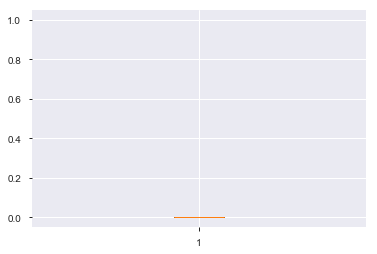

In [25]:
plt.boxplot(df.mag_record_type)

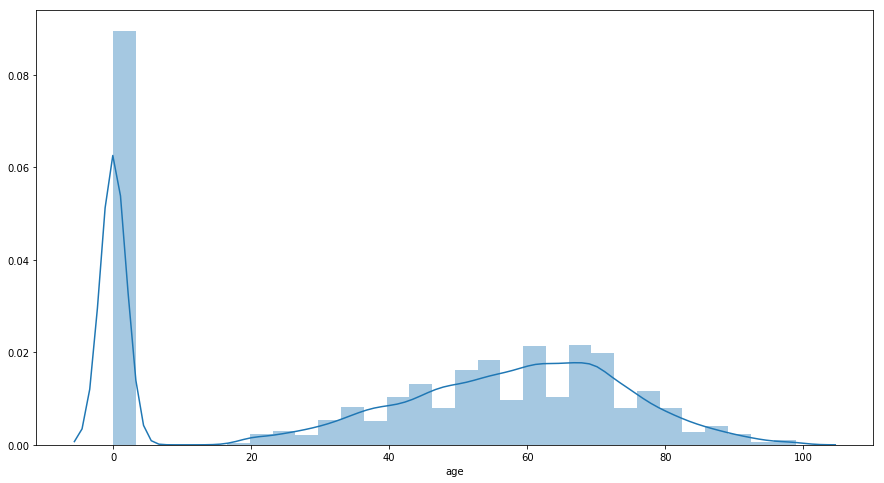

In [6]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df.age, bins =30)

In [21]:
df1.age.isnull().sum()

0

In [22]:
numerical_columns=df1.select_dtypes(exclude='object')

In [23]:
catagorical_columns=df1.select_dtypes(include='object')

In [24]:
numerical_columns.columns

Index(['ind_urn', 'mag_record_type', 'products_recently_purchased', 'age',
       'wedding_date', 'ib_household_income', 'ib_adults_num_hh_100',
       'ib_age_1st_individual_100', 'ib_buy_auto', 'ib_car_purchase',
       'ib_children_num_hh_100', 'ib_education_1st_ind_100',
       'ib_home_year_built', 'ib_household_size_100',
       'ib_length_of_residence_100', 'ib_net_worth_estimator',
       'ib_orders_num_low_scale_cat', 'ib_orders_num_lw_mid_scl_cat',
       'ib_orders_num_mid_scale_cat', 'ib_orders_num_mid_up_cat',
       'ib_orders_num_unk_scl_cat', 'ib_orders_num_up_cat',
       'ib_travel_business_domestic'],
      dtype='object')

In [32]:
df1.mag_record_type.value_counts()

0    988195
1     11805
Name: mag_record_type, dtype: int64

In [27]:
df1.isna().sum()

ind_urn                                0
mag_expiration_date                    2
mag_record_type                        0
products_recently_purchased            0
email_presence_flag                    0
date_individual_added                347
city                                8147
state                                139
country_code                         380
ac_nielsen_county_size_code        22289
gender                                 0
age                                    0
customer_type                          0
wedding_budget                    998862
wedding_date                      999993
wedding_location                  998840
ib_household_income               364290
ib_home_market_value              272457
ib_comm_involve_don_cultural      563537
ib_comm_involve_animal_welf       929618
ib_comm_involve_children          931887
ib_comm_involve_wildlife_env      890088
ib_comm_involve_health            830636
ib_comm_involve_internat_aid      991217
ib_comm_involve_

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

ValueError: could not convert string to float: '2002-09-30'

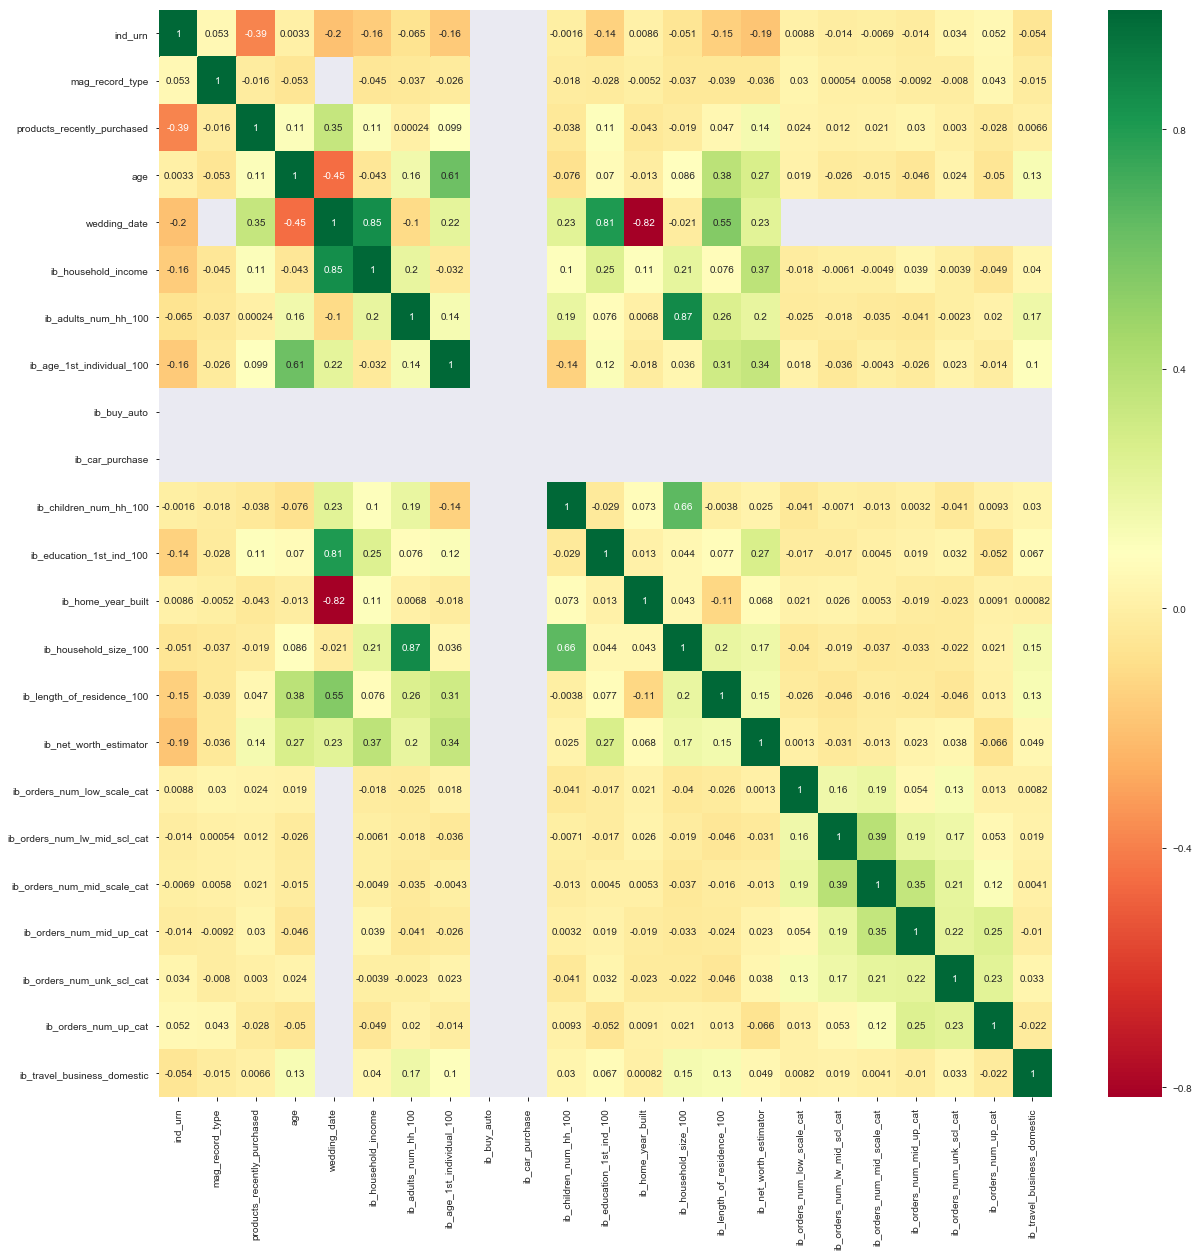

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
import pandas as pd
import numpy as np

data = df1
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\VINOTH S\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '2002-09-30'